### Context:
In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
bite = pd.read_csv("Health_AnimalBites.csv")

In [9]:
bite.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

- bite_date: The date the bite occurred
- SpeciesIDDesc: The species of animal that did the biting
- BreedIDDesc: Breed (if known)
- GenderIDDesc: Gender (of the animal)
- color: color of the animal
- vaccination_yrs: how many years had passed since the last vaccination
- vaccination_date: the date of the last vaccination
- victim_zip: the zipcode of the victim
- AdvIssuedYNDesc: whether advice was issued
- WhereBittenIDDesc: Where on the body the victim was bitten
- quarantine_date: whether the animal was quarantined
- DispositionIDDesc: whether the animal was released from quarantine
- headsentdate: the date the animal’s head was sent to the lab
- release_date: the date the animal was released
- ResultsIDDesc: results from lab tests (for rabies)

In [10]:
bite.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [22]:
bite.shape

(9003, 15)

In [24]:
bite.isna().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

Animal Species

In [12]:
bite.SpeciesIDDesc.value_counts()

DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

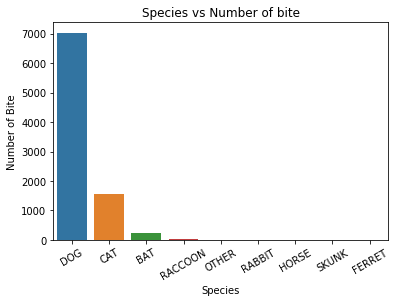

In [131]:
# Dogs and Cats bites the most because they are the most common pets
ax = sns.countplot(bite.SpeciesIDDesc)
plt.xticks(rotation=30)
plt.xlabel("Species")
plt.ylabel("Number of Bite")
plt.title("Species vs Number of bite");

#### When animal bites

In [132]:
def animal_month(animal,data):
    month_list= ['01','02','03','04','05','06','07','08','09','10','11','12']
    numberOfAnimal = []
    for i in month_list:
        x = data.loc[(data['SpeciesIDDesc']==animal)&(data['bite_date'].str.split('-').str[1]==i)]
        numberOfAnimal.append(len(x))
    ax = sns.lineplot(x=month_list,y=numberOfAnimal,color='skyblue')
    plt.title(animal + ' bite for 12 month')
    plt.xlabel("Month")
    plt.ylabel("Number of bites")

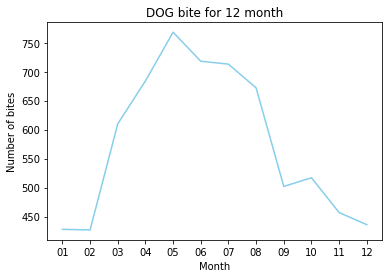

In [133]:
# Dogs bites more starting from April to August
animal_month('DOG',bite)

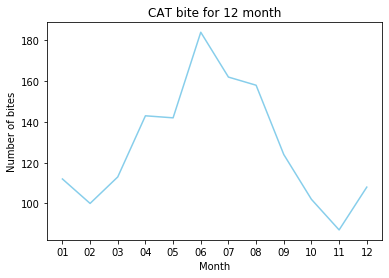

In [134]:
# Cats bites the most in summer time, especially in June
animal_month('CAT',bite)

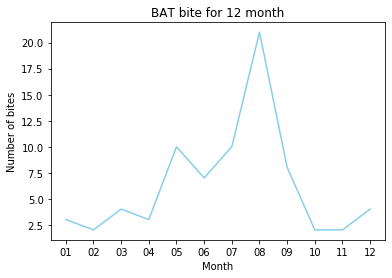

In [135]:
# Bat bites the most in August. 
animal_month('BAT',bite)

### The most dangerous breeds

In [67]:
# Check how many null values are ther for dog breed
print("Total dog bites: ",(bite["SpeciesIDDesc"]=="DOG").sum())
print("Not null dog breed: ",bite[bite["SpeciesIDDesc"]=="DOG"]["BreedIDDesc"].notnull().sum())

Total dog bites:  7029
Not null dog breed:  3755


In [65]:
# Check how many null values are ther for cat breed
print("Total cat bites: ",(bite["SpeciesIDDesc"]=="CAT").sum())
print("Not null cat breed: ",bite[bite["SpeciesIDDesc"]=="CAT"]["BreedIDDesc"].notnull().sum())

Total cat bites:  1568
Unknown cat breed:  3


In [68]:
# Check how many null values are ther for bat breed
print("Total cat bites: ",(bite["SpeciesIDDesc"]=="BAT").sum())
print("Not null cat breed: ",bite[bite["SpeciesIDDesc"]=="BAT"]["BreedIDDesc"].notnull().sum())

Total cat bites:  237
Not null cat breed:  0


We will only consider dog breed here, since only dogs has the most non null values.

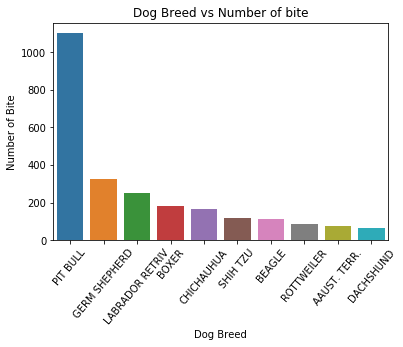

In [83]:
dog_breed_count = bite[bite["SpeciesIDDesc"]=="DOG"]["BreedIDDesc"].value_counts()
ax = sns.barplot(dog_breed_count.head(10).index,dog_breed_count.head(10))
plt.xticks(rotation=50)
plt.xlabel("Dog Breed")
plt.ylabel("Number of Bite")
plt.title("Dog Breed vs Number of bite");

The 10 most aggressive dog breeds are:
- PIT BULL
- GERM SHEPHERD
- LABRADOR RETRIV
- BOXER
- CHICHAUHUA
- SHIH TZU
- BEAGLE
- ROTTWEILER
- AAUST. TERR.
- DACHSHUND

Compare with the 10 most popular dog breeds in the US. 
1. Retrievers (Labrador)
2. German Shepherd Dogs
3. Retrievers (Golden)
4. French Bulldogs
5. Bulldogs
6. Poodles
7. Beagles
8. Rottweilers
9. Pointers (German Shorthaired)
10. Pembroke Welsh Corgis

We can find Labrador and German Shepherd are in the top 3 popular dog breeds. These two breeds may not be aggressive. The number of Labrador and German Shepherd are high, so these two breeds have higher bites on file. 

The rest of breeds on the 10 most aggressive dog breeds can still be conclude as aggressive dog breeds.

### Which color is the most dangerous?

In [119]:
# Check how many null values are ther for dog breed
print("Total dog bites: ",(bite["SpeciesIDDesc"]=="DOG").sum())
print("Not null dog breed: ",bite[bite["SpeciesIDDesc"]=="DOG"]["color"].notnull().sum())

Total dog bites:  7029
Not null dog breed:  5340


In [120]:
# Check how many null values are ther for cat breed
print("Total cat bites: ",(bite["SpeciesIDDesc"]=="CAT").sum())
print("Not null cat breed: ",bite[bite["SpeciesIDDesc"]=="CAT"]["color"].notnull().sum())

Total cat bites:  1568
Not null cat breed:  1062


In [122]:
# Check how many null values are ther for bat breed
print("Total cat bites: ",(bite["SpeciesIDDesc"]=="BAT").sum())
print("Not null cat breed: ",bite[bite["SpeciesIDDesc"]=="BAT"]["color"].notnull().sum())

Total cat bites:  237
Not null cat breed:  12


Only do analysis to dog and cat here, because they have the most non null values.

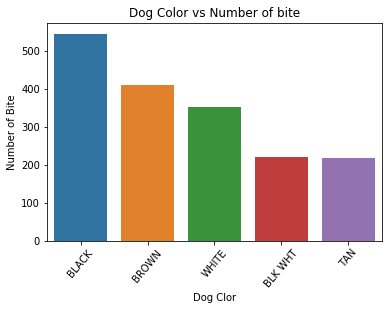

In [127]:
# What color of dogs are more aggressive? 
# Black and Brown
dog_color_count = bite[bite["SpeciesIDDesc"]=="DOG"]["color"].value_counts()
ax = sns.barplot(dog_color_count.head(5).index,dog_color_count.head(5))
plt.xticks(rotation=50)
plt.xlabel("Dog Clor")
plt.ylabel("Number of Bite")
plt.title("Dog Color vs Number of bite");

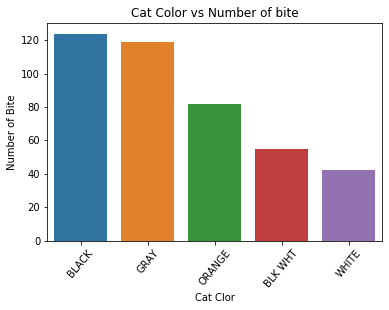

In [128]:
# What color of cat are more aggressive?
# Black and Grey
dog_color_count = bite[bite["SpeciesIDDesc"]=="CAT"]["color"].value_counts()
ax = sns.barplot(dog_color_count.head(5).index,dog_color_count.head(5))
plt.xticks(rotation=50)
plt.xlabel("Cat Clor")
plt.ylabel("Number of Bite")
plt.title("Cat Color vs Number of bite");

### Which gender gets bite more?

Male gets more bite than female. Males are about 2 times more dangerous than females. Males should leave animals alone and do not tease them too hard.

In [93]:
# There are 2526 missing values for gender
bite.GenderIDDesc.isna().sum()

2526

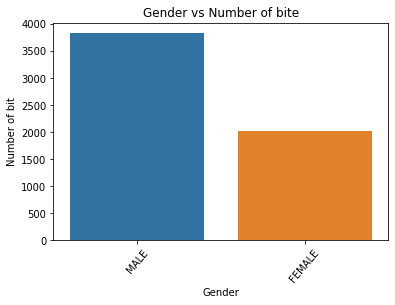

In [91]:
gender_bite = bite.GenderIDDesc.value_counts()
ax = sns.barplot(gender_bite.head(2).index,gender_bite.head(2))
plt.xticks(rotation=50)
plt.xlabel("Gender")
plt.ylabel("Number of bit")
plt.title("Gender vs Number of bite");

### Body or Head?

In [95]:
# There are 616 missing values in WhereBittenIDDesc
bite.WhereBittenIDDesc.isna().sum()

616

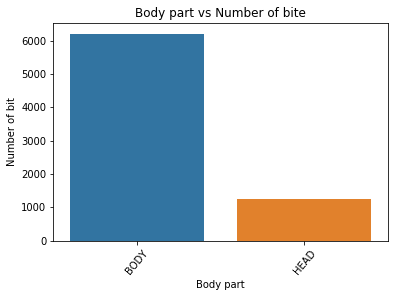

In [98]:
where_bite = bite.WhereBittenIDDesc.value_counts()
ax = sns.barplot(where_bite.head(2).index,where_bite.head(2))
plt.xticks(rotation=50)
plt.xlabel("Body part")
plt.ylabel("Number of bit")
plt.title("Body part vs Number of bite");

### Conlusion

Amount all animals, dogs bite the most, then cats. Bat, the third place of the rank, also bite people sometimes.

In all seasons, animals are more active in the summertime. Please keep your pets cool or keep them away from people when they show anxiety. If you do not own a pet and would not like to suffer the risk of being bite, stay away from animals in summer. 

Overall, black animals are more aggressive than other colors. If you are considering of being bite, stay away from black animals would lower your risk.

Males get bite more than females. Maybe because males are usually bolder than females and are more likely to tease an animal. Advice: such bold may increase the risk of getting bite, please do not tease unfamiliar animals. 
